In [1]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

'Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload.'

In [47]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

print(f"Root directory: {root_dir} is added to sys.path")


Root directory: /Users/aag/Documents/proteinfolding is added to sys.path


In [49]:
## test imports

from proteinfolding import * ## should run without errors

##TODO: proper testing ##

In [50]:
from proteinfolding.data_processing import *
from proteinfolding.paths import XY_QAOA_DATA_DIR, XY_QAOA_PLOTS_FRACTION_DIR

SIMULATION_ID = "A125769"
PLOT_DIR = os.path.join(XY_QAOA_PLOTS_FRACTION_DIR, SIMULATION_ID)
PROCESSED_DATA_DIR = os.path.join(XY_QAOA_DATA_DIR, SIMULATION_ID)

In [51]:
# load csv as dataframe

import pandas as pd

df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, f"{SIMULATION_ID}.csv.gz"), compression='gzip')

In [52]:
df.head(n=1000)

,num_res,num_rot,alpha,shots,p,pos,transverse_field,ground_state_info,parameters
0,5,5,0.2,10000,3,0,1,"{'min_iter': 3, 'bitstring': '0100000100000010...","[[[0.9, -1.0, 0.0, 0.0, 0.1, 1.0]], [[1.9, -1...."
1,5,5,0.2,10000,2,0,1,"{'min_iter': 1, 'bitstring': '0100000100000010...","[[[0.9, -1.0, 0.1, 1.0]]]"
2,5,5,0.2,5000,7,0,1,"{'min_iter': 1, 'bitstring': '0100000100000010...","[[[0.9, -1.0, -0.06666666666666668, -0.6666666..."
3,5,5,0.2,10000,4,0,1,"{'min_iter': 5, 'bitstring': '0100000100000010...","[[[0.9, -1.0, -0.03333333333333334, -0.3333333..."
4,5,5,0.2,1000,3,0,1,"{'min_iter': 3, 'bitstring': '0100000100000010...","[[[0.9, -1.0, 0.0, 0.0, 0.1, 1.0]], [[1.9, -1...."
5,5,5,0.2,1000,6,0,1,"{'min_iter': 1, 'bitstring': '0100000100000010...","[[[0.9, -1.0, -0.060000000000000005, -0.6, -0...."
6,5,5,0.2,1000,5,0,1,"{'min_iter': 3, 'bitstring': '0100000100000010...","[[[0.9, -1.0, -0.05, -0.5, 0.0, 0.0, 0.0500000..."
7,5,5,0.2,1000,4,0,1,"{'min_iter': 16, 'bitstring': '010000010000001...","[[[0.9, -1.0, -0.03333333333333334, -0.3333333..."
8,5,5,0.2,5000,5,0,1,"{'min_iter': 3, 'bitstring': '0100000100000010...","[[[0.9, -1.0, -0.05, -0.5, 0.0, 0.0, 0.0500000..."
9,5,5,0.2,10000,6,0,1,"{'min_iter': 4, 'bitstring': '0100000100000010...","[[[0.9, -1.0, -0.060000000000000005, -0.6, -0...."


# Good String Probability

In [12]:
# main.py
from proteinfolding.data_plotter import DataPlotter

plotter = DataPlotter(df)

xaxis = 'p'
# plot fraction vs shots for each num_res and num_rot
plotter.generate_plots_of_fractions_for_all_res_rot_pairs(save_path = PLOT_DIR, xaxis = xaxis)


KeyError: 'fraction'

<Figure size 640x480 with 0 Axes>

# Shots to find exact ground state

In [53]:
df.head()

,num_res,num_rot,alpha,shots,p,pos,transverse_field,bitstrings,probabilities,norm,energy,elapsed_time,intermediate_data,parameters,cumulative_probability_dict,cumulative_total_dict,all_bitstrings,all_unrestricted_bitstrings,sorted_bitstrings,sorted_unrestricted_bitstrings
0,4,5,0.2,35,3,0,1,"['10000001000000100010', '10000001000100000100...","[0.007194244604316553, 0.007194244604316553, 0...",3.971429,-35.788970,121.717323,"[{'69764': 0.14285714285714285, '133188': 0.02...","[[[0.012857450221717887, 0.11278411990580062, ...","{'00010001000010000100': 0.19999999999999998, ...","{'00010001000010000100': 0.19999999999999998, ...",{'00001010000010000010': {'probability': 0.028...,{'00001010000010000010': {'probability': 0.028...,"[['10000001000000100010', {'probability': 0.02...","[['10000001000000100010', {'probability': 0.02..."
1,4,5,0.2,35,2,0,1,"['10000001000000100100', '10000010000000100100...","[0.0022857142857142716, 0.0005714285714285679,...",50.000000,-34.825700,1240.611428,"[{'33828': 0.02857142857142857, '36996': 0.057...","[[[-0.048373463580982205, 0.4035172437524599, ...","{'00001000010000100100': 0.08571428571428572, ...","{'00001000010000100100': 0.08571428571428572, ...",{'00001001000000100100': {'probability': 0.257...,{'00001001000000100100': {'probability': 0.257...,"[['10000001000000100100', {'probability': 0.11...","[['10000001000000100100', {'probability': 0.11..."
2,5,5,0.2,25,2,0,1,"['0000100100000010000100010', '000010010000001...","[0.0008000000000000067, 0.0024000000000000197,...",50.000000,-55.512372,63773.522242,"[{'1180706': 0.04, '1180801': 0.04, '1181188':...","[[[-0.08407735618536186, 0.5399882317836135, -...","{'0000100100000010000100010': 0.04, '000010010...","{'0000100100000010000100010': 0.04, '000010010...",{'0000100001100000010000100': {'probability': ...,{'0000100001100000010000100': {'probability': ...,"[['0000100100000010000100010', {'probability':...","[['0000100100000010000100010', {'probability':..."
3,4,5,0.2,40,5,0,1,"['10000001000000100010', '10000001000000100100...","[0.018181818181818212, 0.009090909090909106, 0...",2.750000,-35.788970,155.272381,"[{'49284': 0.025, '67618': 0.025, '67714': 0.0...","[[[0.052561011827601256, -0.2309716750506099, ...","{'00001100000010000100': 0.025, '0001000010000...","{'00001100000010000100': 0.025, '0001000010000...",{'00001001000010000010': {'probability': 0.025...,{'00001001000010000010': {'probability': 0.025...,"[['10000001000000100010', {'probability': 0.05...","[['10000001000000100010', {'probability': 0.05..."
4,4,5,0.2,40,6,0,1,"['10000001000000100010', '10000010000000100010...","[0.0010893246187363875, 0.006535947712418324, ...",22.950000,-35.788970,1540.878126,"[{'35330': 0.025, '66824': 0.025, '67618': 0.0...","[[[-0.00269796427637381, -0.6457512905263341, ...","{'00001000101000000010': 0.05, '00010000010100...","{'00001000101000000010': 0.05, '00010000010100...",{'00001000010000101000': {'probability': 0.025...,{'00001000010000101000': {'probability': 0.025...,"[['10000001000000100010', {'probability': 0.02...","[['10000001000000100010', {'probability': 0.02..."


In [54]:
from proteinfolding.paths import MIN_SHOTS_TO_FIND_GS_FILE, XY_QAOA_PLOTS_MIN_SHOTS_TO_GS_DIR

df_min_shots = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, MIN_SHOTS_TO_FIND_GS_FILE))


In [55]:
plotter.plot_min_shots(df_min_shots, save_path = os.path.join(XY_QAOA_PLOTS_MIN_SHOTS_TO_GS_DIR, SIMULATION_ID))

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

# Initial and Final Probability Distributions

In [23]:
from proteinfolding.paths import INITIAL_AND_FINAL_PROBABILITY_DISTRIBUTIONS_FILE

print(PROCESSED_DATA_DIR)
df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, INITIAL_AND_FINAL_PROBABILITY_DISTRIBUTIONS_FILE))

/Users/aag/Documents/proteinfolding/data/processed/xy_qaoa/A125047


FileNotFoundError: [Errno 2] No such file or directory: '/Users/aag/Documents/proteinfolding/data/processed/xy_qaoa/A125047/initial_and_final_probability_distributions.csv'

In [24]:
df.head(n=1000)

,num_res,num_rot,alpha,shots,p,pos,transverse_field,bitstrings,probabilities,norm,energy,elapsed_time,intermediate_data,parameters,cumulative_probability_dict,cumulative_total_dict,all_bitstrings,all_unrestricted_bitstrings,sorted_bitstrings,sorted_unrestricted_bitstrings
0,5,4,0.2,1000,2,0,1,"['01000010000100100001', '01000100100000100001...","[0.0008250825082508303, 0.008250825082508302, ...",1.212000,-41.595531,44.837635,"[{'69956': 0.001, '69960': 0.001, '70017': 0.0...","[[[-0.007008953857186168, 0.30390853972708487,...","{'00010001000101000100': 0.001, '0001000100010...","{'00010001000101000100': 0.001, '0001000100010...",{'00010001000101000001': {'probability': 0.001...,{'00010001000101000001': {'probability': 0.001...,"[['01000010000100100001', {'probability': 0.00...","[['01000010000100100001', {'probability': 0.00..."
1,7,3,0.2,10000,5,0,1,"['010001010010100100100', '0100010100101001000...","[0.0026155187445510114, 0.0005231037489102023,...",0.573500,-38.212928,135.589115,"[{'299593': 0.0002, '299596': 0.0004, '299601'...","[[[0.008116004872698174, 0.1853881807857587, 0...","{'001001001001001001001': 0.0002, '00100100100...","{'001001001001001001001': 0.0002, '00100100100...",{'001001001001001001001': {'probability': 0.00...,{'001001001001001001001': {'probability': 0.00...,"[['010001010010100100100', {'probability': 0.0...","[['010001010010100100100', {'probability': 0.0..."
2,5,4,0.2,5000,5,0,1,"['01000010000100100001', '01000010000100010001...","[0.012387387387387391, 0.017454954954954964, 0...",0.710400,-41.595531,57.377180,"[{'69905': 0.0002, '69908': 0.0006, '69912': 0...","[[[0.012888267375583046, -0.9084285160963732, ...","{'00010001000100010001': 0.0002, '000100010001...","{'00010001000100010001': 0.0002, '000100010001...",{'00010001000100010001': {'probability': 0.000...,{'00010001000100010001': {'probability': 0.000...,"[['01000010000100100001', {'probability': 0.00...","[['01000010000100100001', {'probability': 0.00..."
3,6,4,0.2,10000,7,0,1,"['010010001000010000101000', '0100100000100100...","[3.4716677197392625e-06, 3.4716677197392625e-0...",28.804600,-59.276988,45239.598864,"[{'1118482': 0.0001, '1118744': 0.0001, '11187...","[[[-0.05819947909976595, -0.6178086482759337, ...",{'000100010001000100010010': 0.001300000000000...,{'000100010001000100010010': 0.001300000000000...,{'000100010001000100011000': {'probability': 0...,{'000100010001000100011000': {'probability': 0...,"[['010010001000010000101000', {'probability': ...","[['010010001000010000101000', {'probability': ..."
4,5,4,0.2,5000,4,0,1,"['01000010000100100001', '01000100100000100001...","[4.4908700611656654e-06, 4.939957067282233e-05...",44.534800,-41.595531,1511.408982,"[{'70018': 0.0004, '70024': 0.0002, '70274': 0...","[[[0.07979006918503229, -0.8701871211916836, -...","{'00010001000110000010': 0.006599999999999999,...","{'00010001000110000010': 0.006599999999999999,...",{'00010001000100100010': {'probability': 0.002...,{'00010001000100100010': {'probability': 0.002...,"[['01000010000100100001', {'probability': 0.00...","[['01000010000100100001', {'probability': 0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,4,5,0.2,25,7,0,1,"['10000001000000100010', '10000000100000100010...","[0.0004171881518564857, 0.0016687526074259428,...",95.880000,-35.788970,7041.333021,"[{'33825': 0.04, '36904': 0.04, '37122': 0.04,...","[[[-0.07736517083915338, -0.9777385110768522, ...","{'00001000010000100001': 0.2, '000010010000001...","{'00001000010000100001': 0.2, '000010010000001...","{'00001010000000100100': {'probability': 0.2, ...","{'00001010000000100100': {'probability': 0.2, ...","[['10000001000000100010', {'probability': 0.04...","[['10000001000000100010', {'probability': 0.04..."
84,4,5,0.2,25,2,0,1,"['10000000101000000010', '01000000100000100010...","[0.000399999999999998, 0.000399999999999998, 0...",100.000000,-33.869229,2059.101288,"[{'34882': 0.04, '36994': 0.04, '41026': 0.04,...","[[[-0.053949666422

In [25]:
# df_select = df[df["num_res"] == 9]
# df_select = df_select[df_select["num_rot"] == 3]
# df_select = df_select[df_select["shots"] == 10]
# # df_select = df_select[df_select["p"] == 1]
# df_select = df_select[df_select["alpha"] == 1.00]

In [26]:
#  df_select.head()

In [27]:
num_res = 8
num_rot = 2

df_temp = df[(df["num_res"] == num_res) & (df["num_rot"] == num_rot)]



In [28]:
# # select row with pos =0, and print final probability distribution

# dist = df_temp[df_temp["pos"] == 0]["final_dist"].values[0]
# print(type(dist))
# import ast
# dist = ast.literal_eval(dist)
# # order dictionary by descending values for values
# sorted_dist = {k: v for k, v in sorted(dist.items(), key=lambda item: item[1], reverse=True)}

# print(sorted_dist)

# from proteinfolding.data_processing import int_to_bitstring

# # print first element of sorted_dist

# print(f"Most probable state: {int_to_bitstring(int(list(sorted_dist.keys())[0]), num_res)} with probability {list(sorted_dist.values())[0]}")
# print(f"Second most probable state: {int_to_bitstring(int(list(sorted_dist.keys())[1]), num_res)} with probability {list(sorted_dist.values())[1]}")
# print(f"Third most probable state: {int_to_bitstring(int(list(sorted_dist.keys())[2]), num_res)} with probability {list(sorted_dist.values())[2]}")


In [43]:
from proteinfolding.paths import EXACT_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE

df_exact = pd.read_csv(os.path.join(EXACT_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE))

In [44]:
df_exact.head()

,num_res,num_rot,energies,bitstrings
0,2,2,"[(0.22744239866733562+0j), (0.0660957843065260...","['1010', '1001', '0110', '0101']"
1,2,3,"[(-1.8422357141971588+0j), (-2.003582328557968...","['100100', '100010', '100001', '010100', '0100..."
2,3,2,"[(-1.5153165645897388+0j), (-0.441403400152921...","['101010', '101001', '100110', '100101', '0110..."
3,3,3,"[(-4.412406247109175+0j), (-3.3384930826723576...","['100100100', '100100010', '100100001', '10001..."
4,4,2,"[(2.9962810706347227+0j), (3.221675081178546+0...","['10101010', '10101001', '10100110', '10100101..."


In [10]:
from proteinfolding.paths import XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, XY_QAOA_PLOTS_PARAMETERS_EVOLUTION_DIR

In [32]:
df[(df["num_res"] == 5) & (df["num_rot"] == 2)].head(n=1000)

,num_res,num_rot,alpha,shots,p,pos,transverse_field,bitstrings,probabilities,norm,energy,elapsed_time,intermediate_data,parameters,cumulative_probability_dict,cumulative_total_dict,all_bitstrings,all_unrestricted_bitstrings,sorted_bitstrings,sorted_unrestricted_bitstrings


KeyError: 'init_energies'

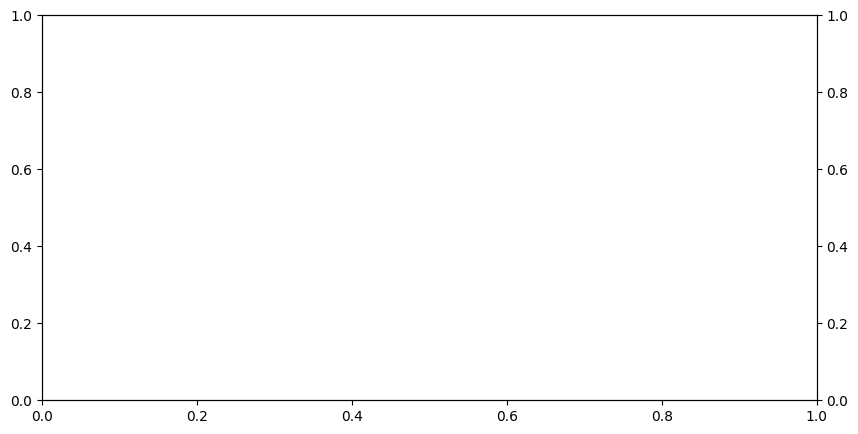

In [33]:
transverse_field_bool = False
pos_bool = False

plotter.plot_init_and_final_probabilities(df, df_exact=df_exact, save_path = os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID), transverse_field_bool = transverse_field_bool, pos_bool = pos_bool)

In [34]:
num_res = 9
num_rot = 3
alpha = 1.0
p = 6
shots = 10000
transverse_field = 1

import matplotlib.pyplot as plt
from pdf2image import convert_from_path

pos = 0

import PyPDF2 as pyPDF2

if transverse_field_bool and pos_bool:
    path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}_transverse_field_{transverse_field}.pdf")
elif pos_bool:
    path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}.pdf")

# path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}.pdf")
# path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}_transverse_field_{transverse_field}.pdf")

images = convert_from_path(path_)

plt.imshow(images[0])
plt.axis('off')
# increase size of plot
plt.gcf().set_size_inches(10, 10)

NameError: name 'path_' is not defined

In [35]:
alpha = 0.2
# pos = 1

import matplotlib.pyplot as plt
from pdf2image import convert_from_path

import PyPDF2 as pyPDF2

if transverse_field_bool and pos_bool:
    path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}_transverse_field_{transverse_field}.pdf")
elif pos_bool:
    path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}.pdf")

images = convert_from_path(path_)

plt.imshow(images[0])
plt.axis('off')
# increase size of plot
plt.gcf().set_size_inches(10, 10)

NameError: name 'path_' is not defined

In [45]:
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

pos = 1

import PyPDF2 as pyPDF2

path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}.pdf")

images = convert_from_path(path_)

plt.imshow(images[0])
plt.axis('off')
# increase size of plot
plt.gcf().set_size_inches(10, 10)

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [27]:
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

pos = 0

import PyPDF2 as pyPDF2

path_= os.path.join(XY_QAOA_PLOTS_PROBABILITY_DISTRIBUTIONS_DIR, SIMULATION_ID, f"res_{num_res}_rot_{num_rot}_alpha_{alpha}_shots_{shots}_p_{p}_pos_{pos}.pdf")

images = convert_from_path(path_)

plt.imshow(images[0])
plt.axis('off')
# increase size of plot
plt.gcf().set_size_inches(10, 10)

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

# Parameter Evolution

In [53]:
from proteinfolding.paths import PARAMETERS_EVOLUTION_FILE

df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, PARAMETERS_EVOLUTION_FILE))

In [54]:
df.head()

,num_res,num_rot,alpha,shots,p,pos,transverse_field,parameters
0,5,5,0.2,10000,3,0,1,"[[0.9, -1.0, 0.0, 0.0, 0.1, 1.0], [1.9, -1.0, ..."
1,5,5,0.2,10000,2,0,1,"[[0.9, -1.0, 0.1, 1.0]]"
2,5,5,0.2,5000,7,0,1,"[[0.9, -1.0, -0.06666666666666668, -0.66666666..."
3,5,5,0.2,10000,4,0,1,"[[0.9, -1.0, -0.03333333333333334, -0.33333333..."
4,5,5,0.2,1000,3,0,1,"[[0.9, -1.0, 0.0, 0.0, 0.1, 1.0], [1.9, -1.0, ..."


In [55]:
save_path = os.path.join(XY_QAOA_PLOTS_PARAMETERS_EVOLUTION_DIR, SIMULATION_ID)
plotter.plot_parameter_evolution(df, save_path=save_path, display=False, transverse_field_bool=False, pos_bool=True)

### Ground state probability

In [ ]:
df.head()

In [ ]:
energies = df["init_energies"].values[0]

In [ ]:
print(energies)